<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%config Completer.use_jedi = False

In [2]:
# Import numpy and pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [3]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [4]:
# Your code here:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [5]:
# Your code here:

#check if any rows have all NaNs
full_nan_indxs = sensor.index[sensor.isnull().all(1)]
nans_r = sensor.iloc[full_nan_indxs]
nans_r

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z


In [6]:
#check rows with NaNs

is_NaN = sensor.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = sensor[row_has_NaN]
rows_with_NaN

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z


There are no NaNs

How many rows and columns are in our data?

In [7]:
# Your code here:
sensor.shape

(1751, 12)

There are 1752 rows and 12 columns 

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [8]:
# Your code here:

dates = pd.date_range("01/01/2018 00:00:00", "01/01/2018 00:29:10", periods=sensor.shape[0])
dates

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq=None)

In [9]:
freq = pd.infer_freq(dates)
print(freq)

S


In [10]:
dates.freq = freq

Assign the time series index to the dataframe's index.

In [11]:
# Your code here:
sensor.index = dates

In [12]:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

In [13]:
# Your code here:
from statsmodels.tsa.seasonal import seasonal_decompose

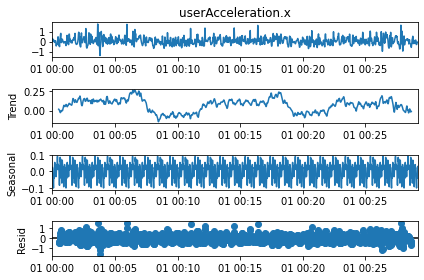

In [14]:
dec_sea_uAx = seasonal_decompose(sensor['userAcceleration.x'], model="additive", period=60)
dec_sea_uAx.plot();

Plot the decomposed time series of rotationRate.x also with a frequency of 60.

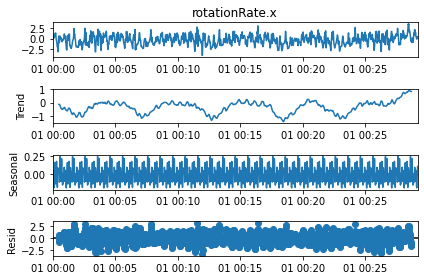

In [15]:
dec_sea_rRx = seasonal_decompose(sensor['rotationRate.x'], model="additive", period=60)
dec_sea_rRx.plot();

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
from statsmodels.graphics.tsaplots import plot_acf

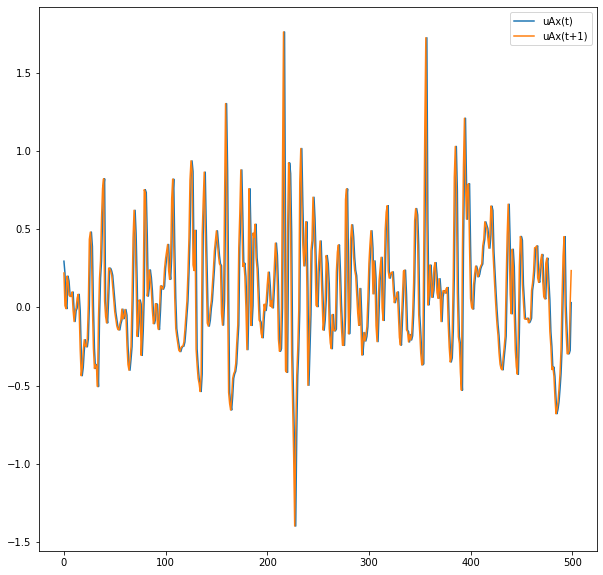

In [18]:
# Your code here:
lag = 1
uAx_t = sensor["userAcceleration.x"][:-lag]
uAx_t_plus_1 = sensor["userAcceleration.x"][lag:]
plt.figure(figsize=(10,10))
plt.plot(uAx_t.values[:500], label="uAx(t)")     # limited output to make it easier to visualize
plt.plot(uAx_t_plus_1.values[:500], label="uAx(t+1)")     # limited output to make it easier to visualize
plt.legend();

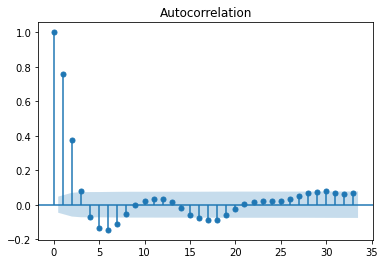

In [19]:
plot_acf(sensor["userAcceleration.x"]);

Create a lag plot for `rotationRate.x`

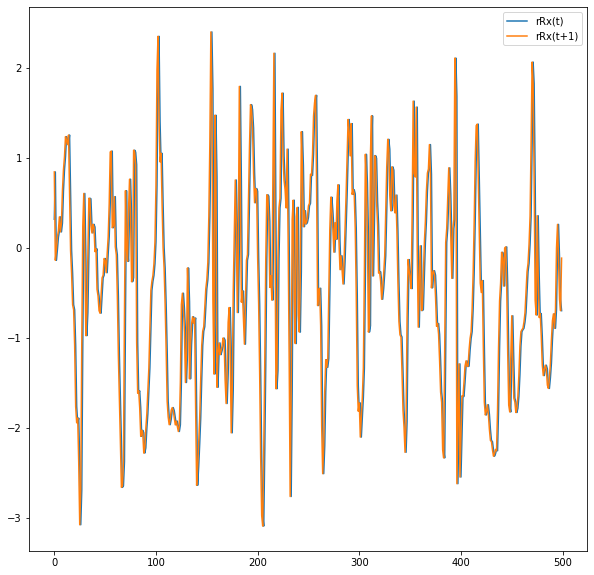

In [20]:
# Your code here:
lag = 1
rRx_t = sensor["rotationRate.x"][:-lag]
rRx_t_plus_1 = sensor["rotationRate.x"][lag:]
plt.figure(figsize=(10,10))
plt.plot(rRx_t.values[:500], label="rRx(t)")     # limited output to make it easier to visualize
plt.plot(rRx_t_plus_1.values[:500], label="rRx(t+1)")     # limited output to make it easier to visualize
plt.legend();

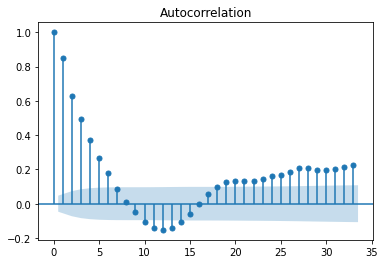

In [21]:
plot_acf(sensor["rotationRate.x"]);

What are your conclusions from both visualizations?

Using gthe lagplot, we can see that, in both cases, a lag of 1 has a massive autocorrelation, as both lines are almost identical

Using plot_acf, we can check autocorrelation with more values for lag.  
We can see that userAcceleration.x has the first two points with large positive autocorrelation. There are three other points under the limit for negative correlation, but the value isn't super high. 
rotationRate.x has the first six points with positive autocorrelation. It is particularly high for the first few values. Again, there are some points with negative autocorrelation in the 10-14 lag and from 19 onwards some positive autocorrelation, but the values are not particularly high

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
# Your code here:
adfuller(sensor["userAcceleration.x"])

(-17.957994086169762,
 2.823439483037483e-30,
 4,
 1746,
 {'1%': -3.434100824760071,
  '5%': -2.863196780129223,
  '10%': -2.5676520210882936},
 -727.6140124402791)

In [24]:
adfuller(sensor["rotationRate.x"])

(-5.2698606250864355,
 6.320230335911768e-06,
 25,
 1725,
 {'1%': -3.4341465551936534,
  '5%': -2.863216966926812,
  '10%': -2.567662770090317},
 2619.6049719981947)

What are your conclusions from this test?

Our adfs are smaller than any of the critical values, so we can reject the null hypothesis: on a 1% confidence level, we can affirm that our data is stationary. This means that the mean and the variance are relatively constant over time

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [25]:
from statsmodels.tsa.arima.model import ARIMA

In [26]:
# Your code here:
y_train = sensor["userAcceleration.x"][:-10]
y_test = sensor["userAcceleration.x"][-10:]

In [27]:
from statsmodels.graphics.tsaplots import plot_pacf

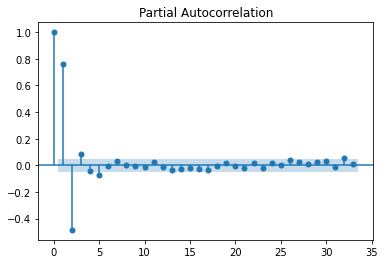

In [28]:
# plotting partial autocorrelation

plot_pacf(y_train);

The first two lags are over the significance level, so we will use p=2

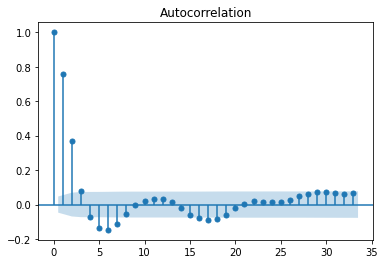

In [29]:
# plotting autocorrelation

plot_acf(y_train);

The first two lags are again over the significance level, so we could use q=2. However, the question states that the order of the model is (2,1), so q=1. We can now create the model

In [30]:
order = (2,0,1)
arma = ARIMA(y_train,order=order, freq="S")
arma;

In [31]:
arma = arma.fit()

In [32]:
### arima.predict(index of first predicted point, index of last predicted point)
y_pred = arma.predict(len(y_train),len(y_train)+9)

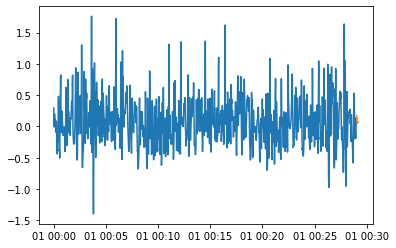

In [33]:
plt.plot(y_train)
plt.plot(y_pred)

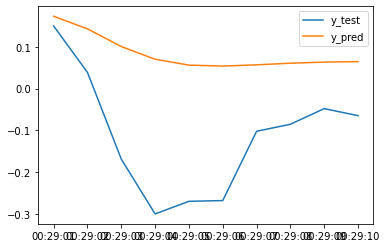

In [34]:
plt.plot(y_test, label = "y_test")
plt.plot(y_pred, label = "y_pred")
plt.legend()

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
# Your code here:
mean_squared_error(y_pred, y_test)

0.05075630705950825

From the RMSE, it seems like the prediction was quite good!